In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import math

movies=pd.read_csv(r'C:\Users\cruise\desktop\Dataset\ml-latest-small\movies.csv', engine='python')
mrating=pd.read_csv(r'C:\Users\cruise\desktop\Dataset\ml-latest-small\ratings.csv', engine='python')
tags=pd.read_csv(r'C:\Users\cruise\desktop\Dataset\ml-latest-small\tags.csv', engine='python')

In [2]:
mrating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
merge=pd.merge(movies,mrating, on="movieId")

In [6]:
merge

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [7]:
merge.groupby("title").rating.mean().sort_values(ascending=False)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [8]:
merge.drop("timestamp",inplace=True,axis=1)

In [9]:
merge.groupby("title").rating.count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [10]:
ratingss=pd.DataFrame(merge.groupby("title").rating.mean())

In [11]:
ratingss

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [12]:
ratingss["num of ratings"]=pd.DataFrame(merge.groupby("title").rating.count())

In [13]:
ratingss

,rating,num of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


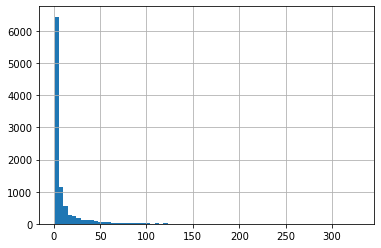

In [14]:
ratingss["num of ratings"].hist(bins=70)

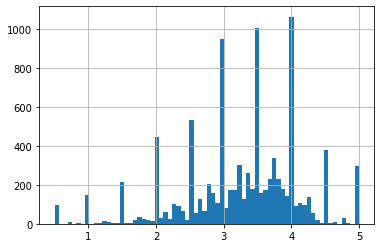

In [15]:
ratingss["rating"].hist(bins=70)

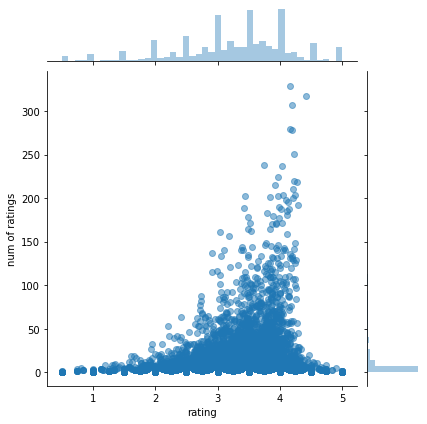

In [16]:
sns.jointplot(x="rating",y="num of ratings", data=ratingss, alpha=0.5)

In [17]:
merge.groupby("genres").rating.count().sort_values(ascending=False)

genres
Comedy                                     7196
Drama                                      6291
Comedy|Romance                             3967
Comedy|Drama|Romance                       3000
Comedy|Drama                               2851
                                           ... 
Animation|Children|Comedy|Drama               1
Animation|Children|Comedy|Drama|Romance       1
Animation|Children|Comedy|Horror              1
Comedy|Fantasy|Horror|Sci-Fi                  1
Crime|Thriller|Western                        1
Name: rating, Length: 951, dtype: int64

In [18]:
moviemat=merge.pivot_table(index="userId", columns="title",values="rating")

In [19]:
moviemat

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]Â² (2009),[REC]Â³ 3 GÃ©nesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),Â¡Three Amigos! (1986),Ã€ nous la libertÃ© (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [20]:
ratingss.sort_values(by="num of ratings", ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [21]:
Forrest_user_ratings=moviemat["Forrest Gump (1994)"]
Shawshank_Redemption_ratings=moviemat["Shawshank Redemption, The (1994)"]
jp_ratings=moviemat["Jurassic Park (1993)"]
xmen_ratings=moviemat["X-Men: Days of Future Past (2014)"]


In [22]:
Forrest_user_ratings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    4.0
607    NaN
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), Length: 610, dtype: float64

In [23]:
similartoforr=moviemat.corrwith(Forrest_user_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [24]:
similartoshaw=moviemat.corrwith(Shawshank_Redemption_ratings)

similartojp=moviemat.corrwith(jp_ratings)
similartoxmen=moviemat.corrwith(xmen_ratings)


In [25]:
corr_forr=pd.DataFrame(similartoforr, columns=["Correlation"])

In [26]:
corr_shaw=pd.DataFrame(similartoshaw,columns=["Correlation"])

In [27]:
corr_forr

,Correlation
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN
...,...
eXistenZ (1999),0.011189
xXx (2002),0.306817
xXx: State of the Union (2005),0.383482


In [28]:
corr_forr=corr_forr.join(ratingss["num of ratings"])

In [29]:
corr_forr[corr_forr["num of ratings"]>20].sort_values(by="Correlation", ascending=False).head(10)

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
Bio-Dome (1996),0.723238,31
Thor: The Dark World (2013),0.715809,21
Fatal Attraction (1987),0.701856,36
X-Men: Days of Future Past (2014),0.682284,30
National Lampoon's Vacation (1983),0.677043,26
Easy A (2010),0.670081,27
Bridesmaids (2011),0.663176,21
"Cabin in the Woods, The (2012)",0.653015,22


In [30]:
corr_shaw=corr_shaw.join(ratingss["num of ratings"])

In [31]:
corr_shaw[corr_shaw["num of ratings"]>20].sort_values(by="Correlation", ascending=False).head(10)

,Correlation,num of ratings
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Twilight (2008),0.845184,22
Moonstruck (1987),0.753878,27
Intouchables (2011),0.744396,37
Grumpy Old Men (1993),0.730972,29
Muriel's Wedding (1994),0.666667,33
Wonder Boys (2000),0.662047,22
Midnight in Paris (2011),0.621372,25
Wallace & Gromit: A Close Shave (1995),0.619625,48


In [32]:
corr_jp=pd.DataFrame(similartojp, columns=["Correlation"])

In [33]:
corr_jp=corr_jp.join(ratingss["num of ratings"])


In [34]:
corr_jp[corr_jp["num of ratings"]>30].sort_values(by="Correlation", ascending=False).head(10)

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,238
Zootopia (2016),0.882712,32
Mulan (1998),0.768935,45
Gravity (2013),0.753847,32
Coraline (2009),0.740472,35
Sgt. Bilko (1996),0.740272,33
Thor (2011),0.714481,34
Despicable Me (2010),0.648468,38
"X-Files: Fight the Future, The (1998)",0.647445,42


In [35]:
corr_xmen=pd.DataFrame(similartoxmen, columns=["Correlation"])

In [36]:
corr_xmen=corr_xmen.join(ratingss["num of ratings"])


In [37]:
corr_xmen[corr_xmen["num of ratings"]>60].sort_values(by="Correlation", ascending=False).head(10)

,Correlation,num of ratings
title,,
"Blair Witch Project, The (1999)",1.000000,64
"Crow, The (1994)",0.970725,64
L.A. Confidential (1997),0.868909,97
Outbreak (1995),0.866025,101
Natural Born Killers (1994),0.866025,92
Contact (1997),0.816497,82
Rocky (1976),0.812807,64
Groundhog Day (1993),0.798023,143
"Patriot, The (2000)",0.793870,68
